# DL_1

## Libraries and Files

In [6]:
import numpy as np # mathematical operations
import pandas as pd # data manipulation
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization

In [7]:
# creating a directory for graphs and results
import os # for directory creation

def create_folder(dir_name):

  # Check if the folder exists
  if os.path.exists(os.getcwd() + '/' + dir_name):
    print("The folder "+ dir_name +" exists.")

  else:
    os.makedirs(dir_name)
    print("Folder "+ dir_name +" created succesfully.")

create_folder('result_files')
create_folder('result_files/confusion_matrices')
create_folder('result_files/balance')
create_folder('result_files/excel_files')

The folder result_files exists.
The folder result_files/confusion_matrices exists.
The folder result_files/balance exists.
The folder result_files/excel_files exists.


## Creating Experiment Class

### Creating a dataframe to save the results

In [8]:
# creating the columns
columns = ['Classifier Name', 'Set type', 'Number of training samples',
           'Number of non-healthy companies in training sample',
           'TP', 'TN', 'FP', 'FN', 'Precision', 'Recall', 'Specificity',
           'F1-Score', 'Accuracy',]

# creating the dataframe with the columns
results_df = pd.DataFrame(columns=columns)

### Experiment Class

In [9]:
# importing the metrics for evaluating the models
from sklearn.metrics import accuracy_score, f1_score, \
                            recall_score, precision_score, \
                            confusion_matrix

# creating a class to help with experiments
class Experiment:

  # constructor takes model, X, y for training
  def __init__(self, X_train, y_train, model):
    self.X_train = X_train
    self.y_train = y_train
    self.model = model

  def train_evaluate(self, X_test, y_test, results_df,
                     cmat_filename='', model_name=''):

    self.model.fit(self.X_train, self.y_train)

    # predictions on the training set
    y_pred_train = self.model.predict(self.X_train)

    # predictions on the test set
    y_pred_test = self.model.predict(X_test)

    # evaluating on the training set
    results_df = self.evaluate_add(self.y_train, y_pred_train, results_df,
            cm_filename=cmat_filename + '_train', set_type='Train',
                      model_name=model_name )


    # evaluating on the given test set
    results_df = self.evaluate_add(y_test, y_pred_test, results_df,
            cm_filename=cmat_filename + '_test', set_type='Test',
                      model_name=model_name )

    return results_df

  # this function helps to add the results to the dataframe
  def add_results(self, results_df, info):

    # appending the results to the DataFrame
    results = pd.DataFrame({col: [result]
                            for col, result in zip(results_df.columns, info)},
                            index=[0])

    results_df = pd.concat([results_df, results],
                                  axis=0, ignore_index=True)

    return results_df



  # creating a function that evaluates the model
  def evaluate(self, y_true, y_pred, fig_name='', set_type='', model_name=''):

    # calculating the results of the metrics
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    # getting the tn, fp, fn, tp
    tp, fn, fp, tn = cm.ravel()

    # calculating specificity
    specificity = tn / (fp + tn)


    # creating a heatmap of the confusion matrix using seaborn
    sns.heatmap(cm, annot=True, cmap='Reds', fmt='d',
                cbar=False, center=cm.max() / 2)

    # adding labels, title, and ticks
    plt.xlabel('Predicted Labels', ha='center')
    plt.ylabel('True Labels', ha='center')
    plt.title(model_name+' Confusion Matrix '+set_type+' Set',
              ha='center')

    # adding extra information in the conf mat plots
    plt.plot([], [],
      label=f'Specificity = {100 * tn / (fp + tn):.2f}%',
      c='k')

    plt.plot([], [],
      label=f'Recall = {100 * tp / (tp + fn):.2f}%',
      c='k')



    plt.xticks(ticks=[0.5, 1.5], labels=['Positive', 'Negative'], ha='center')
    plt.yticks(ticks=[0.5, 1.5], labels=['Positive', 'Negative'], va='center')

    # showing the plot
    plt.legend()
    plt.savefig('result_files/confusion_matrices/' + fig_name,
                bbox_inches='tight')
    plt.show()

    # printing the results of the other metrics
    print(f'Accuracy = {acc:.3f}')
    print(f'F1-Score = {f1:.3f}')
    print(f'Recall Score = {recall:.3f}')
    print(f'Precision Score = {precision:.3f}')

    print(f'TP = {tp} FN = {fn}')
    print(f'FP = {fp} TN = {tn} \n')

    print(f'Prediction Success on Non-Healthy = {100 * specificity:.2f}%')
    print(f'Prediction Success on Healthy = {100 * tp / (tp + fn):.2f}% \n')

    return tp, tn, fp, fn, round(precision, 3), \
           round(recall, 3), round(specificity, 3), round(f1, 3), round(acc, 3)

  # evaluates results and adds them to the results dataframe
  def evaluate_add(self, y_true, y_pred, results_df,
                  cm_filename='', set_type='', model_name='' ):

    # evaluating results
    eval_test = self.evaluate(y_true, y_pred, fig_name=cm_filename,
                              set_type=set_type, model_name=model_name)

    # adding resutls to the results dataframe
    info = [model_name,
            set_type,
            len(self.y_train),
            len(self.y_train[self.y_train==2])] + list(eval_test)



    results_df = self.add_results(results_df, info)

    return results_df




## Data Loading

In [10]:
# reading the xlsx data
df = pd.read_excel('Dataset2Use_PartA.xlsx')

# showing the data
df.head()

,365* ( Β.Υ / Κοστ.Πωλ ),Λειτ.Αποτ/Συν.Ενεργ. (ROA),ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ,ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ : (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ,(ΑΠΑΙΤ.*365) / ΠΩΛ.,Συν.Υποχρ/Συν.Ενεργ,Διάρκεια Παραμονής Αποθεμάτων,Λογαριθμος Προσωπικού,ΕΝΔΕΙΞΗ ΕΞΑΓΩΓΩΝ,ΕΝΔΕΙΞΗ ΕΙΣΑΓΩΓΩΝ,ΕΝΔΕΙΞΗ ΑΝΤΙΠΡΟΣΩΠΕΙΩΝ,ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1),ΕΤΟΣ
0,1014.128862,0.011751,0.038505,0.965479,567.866550,0.532258,545.195964,0.301030,0,1,0,1,2006
1,561.974631,0.099662,0.015775,1.415467,335.917481,0.660556,7.950910,1.176091,1,1,1,1,2006
2,826.919025,0.009594,0.093562,1.575034,350.618086,0.550912,28.602221,1.204120,0,1,1,1,2006
3,493.176956,0.196284,0.000581,1.346780,414.508709,0.683717,1.216888,1.431364,0,0,0,1,2006
4,100.421465,0.179038,0.000173,3.299687,118.548381,0.254496,52.346321,1.518514,0,1,1,1,2006


## Train-Test Split

In [11]:
# importing train_test_split class for splitting
from sklearn.model_selection import train_test_split

# separating the features and the targets
features = df.iloc[:, 0:11]
target = df.iloc[:, 11]

# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.2,
                                                    random_state=42)


## Data Normalization

In [12]:
# importing classes for normalization
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# creating an instance of the normalization class
scaler = MinMaxScaler()

# fitting scaler on the training data
scaler.fit(X_train, y_train)

# transforming training and testing data
X_train_norm = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_norm = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

## Training Models on Data without Balancing the Classes

In [13]:
# importing the models that will be used
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

### Linear Discriminant Analysis

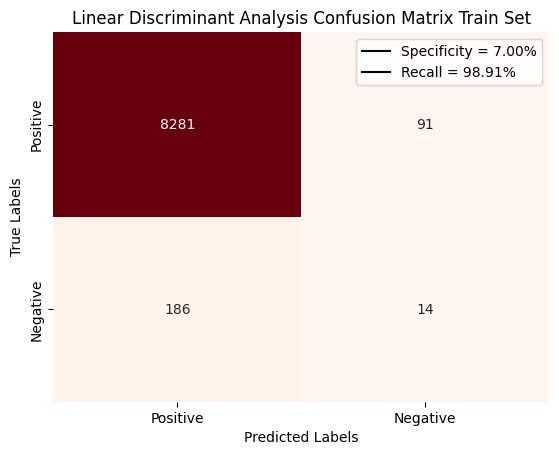

Accuracy = 0.968
F1-Score = 0.984
Recall Score = 0.989
Precision Score = 0.978
TP = 8281 FN = 91
FP = 186 TN = 14 

Prediction Success on Non-Healthy = 7.00%
Prediction Success on Healthy = 98.91% 



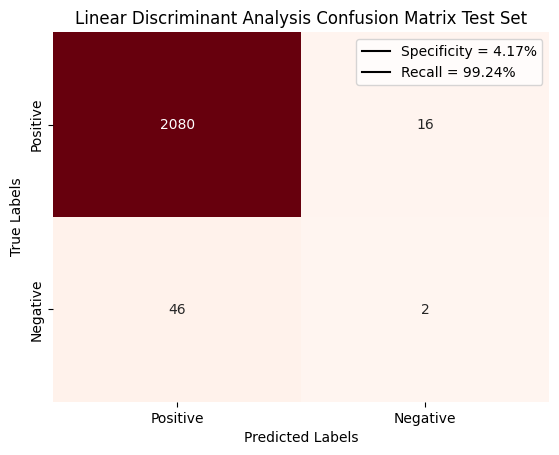

Accuracy = 0.971
F1-Score = 0.985
Recall Score = 0.992
Precision Score = 0.978
TP = 2080 FN = 16
FP = 46 TN = 2 

Prediction Success on Non-Healthy = 4.17%
Prediction Success on Healthy = 99.24% 



In [14]:
# creating an object of the experiment class
lda_exp = Experiment(X_train_norm, y_train, LinearDiscriminantAnalysis())

# training the data with the lda model
results_df = lda_exp.train_evaluate(X_test_norm, y_test, results_df,
                                   cmat_filename='lda_cm_unbalanced',
                                   model_name='Linear Discriminant Analysis')

### Logistic Regression

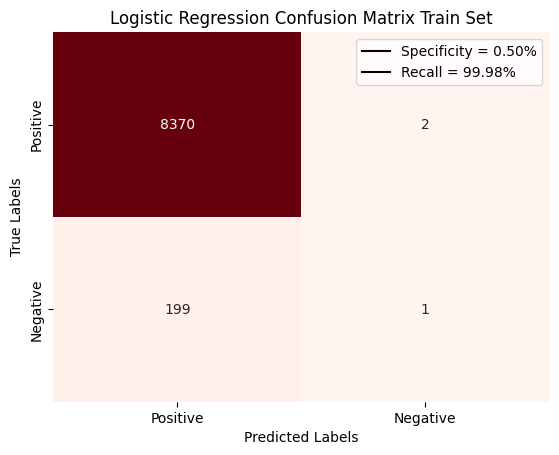

Accuracy = 0.977
F1-Score = 0.988
Recall Score = 1.000
Precision Score = 0.977
TP = 8370 FN = 2
FP = 199 TN = 1 

Prediction Success on Non-Healthy = 0.50%
Prediction Success on Healthy = 99.98% 



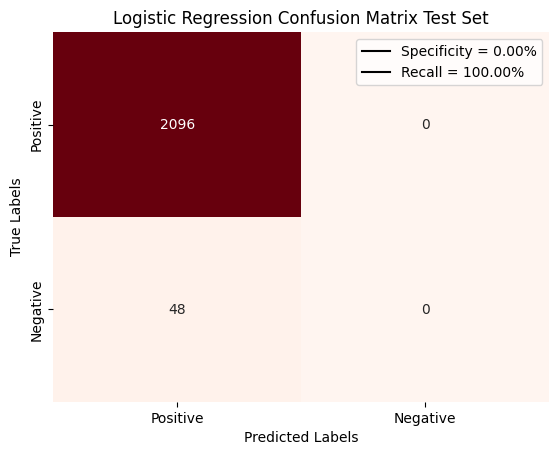

Accuracy = 0.978
F1-Score = 0.989
Recall Score = 1.000
Precision Score = 0.978
TP = 2096 FN = 0
FP = 48 TN = 0 

Prediction Success on Non-Healthy = 0.00%
Prediction Success on Healthy = 100.00% 



In [15]:
# creating an object of the experiment class
lr_exp = Experiment(X_train_norm, y_train, LogisticRegression())

# training the data with the logistic regression model
results_df = lr_exp.train_evaluate(X_test_norm, y_test, results_df,
                                   cmat_filename='lr_cm_unbalanced',
                                   model_name='Logistic Regression')

### Decision Tree

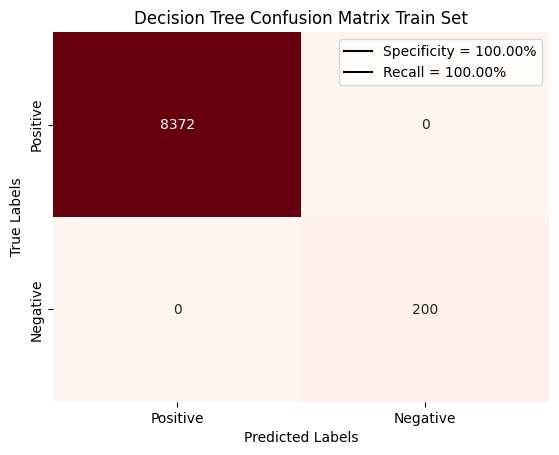

Accuracy = 1.000
F1-Score = 1.000
Recall Score = 1.000
Precision Score = 1.000
TP = 8372 FN = 0
FP = 0 TN = 200 

Prediction Success on Non-Healthy = 100.00%
Prediction Success on Healthy = 100.00% 



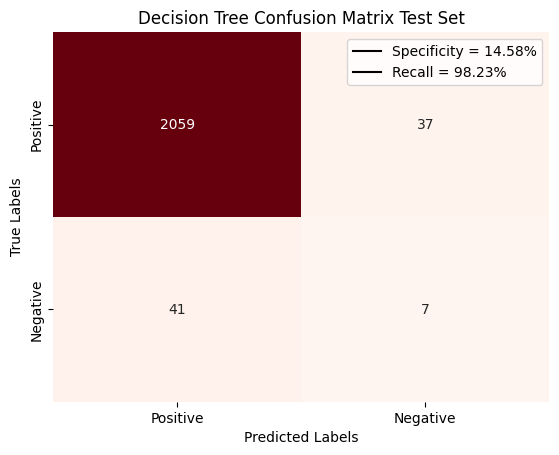

Accuracy = 0.964
F1-Score = 0.981
Recall Score = 0.982
Precision Score = 0.980
TP = 2059 FN = 37
FP = 41 TN = 7 

Prediction Success on Non-Healthy = 14.58%
Prediction Success on Healthy = 98.23% 



In [16]:
# creating an object of the experiment class
dt_exp = Experiment(X_train_norm, y_train, DecisionTreeClassifier())

# training the data with the decision tree model
results_df = dt_exp.train_evaluate(X_test_norm, y_test, results_df,
                                   cmat_filename='dt_cm_unbalanced',
                                   model_name='Decision Tree')


### KNN

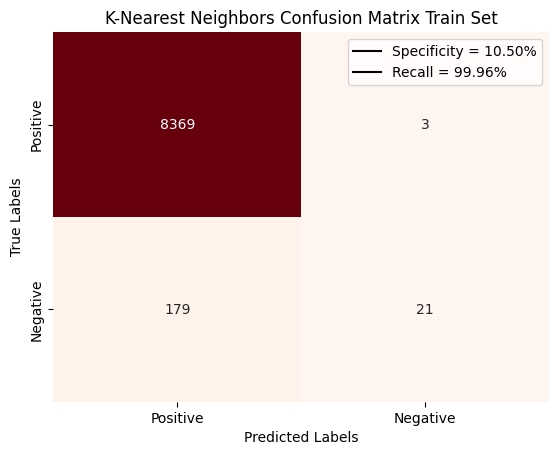

Accuracy = 0.979
F1-Score = 0.989
Recall Score = 1.000
Precision Score = 0.979
TP = 8369 FN = 3
FP = 179 TN = 21 

Prediction Success on Non-Healthy = 10.50%
Prediction Success on Healthy = 99.96% 



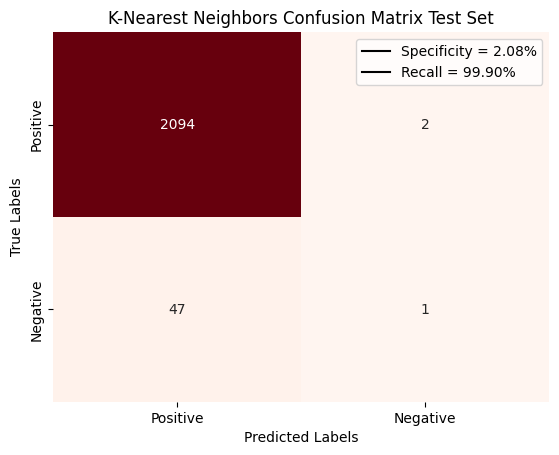

Accuracy = 0.977
F1-Score = 0.988
Recall Score = 0.999
Precision Score = 0.978
TP = 2094 FN = 2
FP = 47 TN = 1 

Prediction Success on Non-Healthy = 2.08%
Prediction Success on Healthy = 99.90% 



In [17]:
# creating an object of the experiment class
knn_exp = Experiment(X_train_norm, y_train, KNeighborsClassifier())

# training the data with the  KNN model
results_df = knn_exp.train_evaluate(X_test_norm, y_test, results_df,
                                    cmat_filename='knn_cm_unbalanced',
                                    model_name='K-Nearest Neighbors')


### Naive Bayes

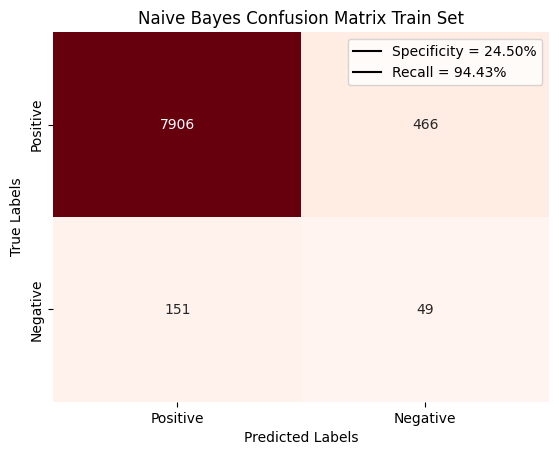

Accuracy = 0.928
F1-Score = 0.962
Recall Score = 0.944
Precision Score = 0.981
TP = 7906 FN = 466
FP = 151 TN = 49 

Prediction Success on Non-Healthy = 24.50%
Prediction Success on Healthy = 94.43% 



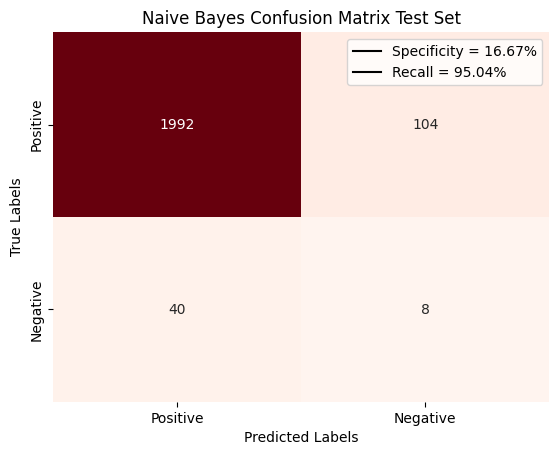

Accuracy = 0.933
F1-Score = 0.965
Recall Score = 0.950
Precision Score = 0.980
TP = 1992 FN = 104
FP = 40 TN = 8 

Prediction Success on Non-Healthy = 16.67%
Prediction Success on Healthy = 95.04% 



In [18]:
# creating an object of the experiment class
nb_exp = Experiment(X_train_norm, y_train, GaussianNB())

# training the data with the naive bayes model
results_df = nb_exp.train_evaluate(X_test_norm, y_test, results_df,
                                   cmat_filename='nb_cm_unbalanced',
                                   model_name='Naive Bayes')


### SVM

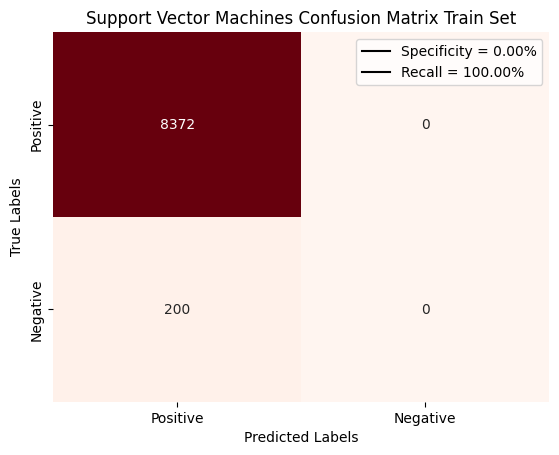

Accuracy = 0.977
F1-Score = 0.988
Recall Score = 1.000
Precision Score = 0.977
TP = 8372 FN = 0
FP = 200 TN = 0 

Prediction Success on Non-Healthy = 0.00%
Prediction Success on Healthy = 100.00% 



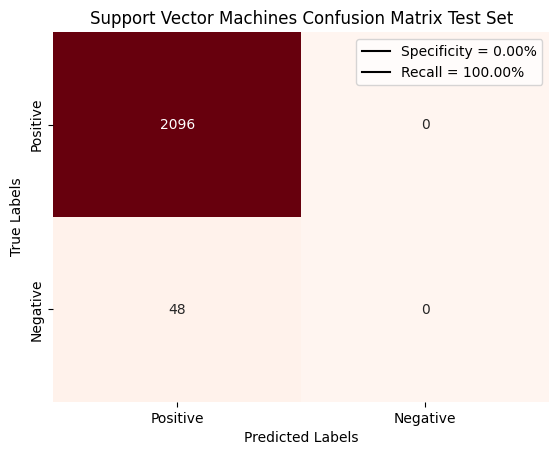

Accuracy = 0.978
F1-Score = 0.989
Recall Score = 1.000
Precision Score = 0.978
TP = 2096 FN = 0
FP = 48 TN = 0 

Prediction Success on Non-Healthy = 0.00%
Prediction Success on Healthy = 100.00% 



In [19]:
# creating an object of the experiment class
svm_exp = Experiment(X_train_norm, y_train, SVC())

# training the data with the svm model
results_df = svm_exp.train_evaluate(X_test_norm, y_test, results_df,
                                   cmat_filename='svm_cm_unbalanced',
                                   model_name='Support Vector Machines')


### MLP

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


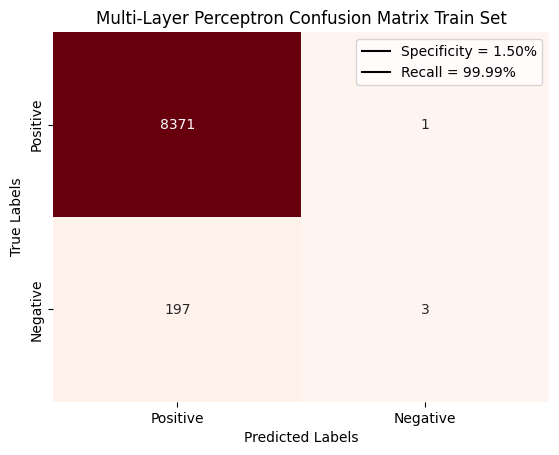

Accuracy = 0.977
F1-Score = 0.988
Recall Score = 1.000
Precision Score = 0.977
TP = 8371 FN = 1
FP = 197 TN = 3 

Prediction Success on Non-Healthy = 1.50%
Prediction Success on Healthy = 99.99% 



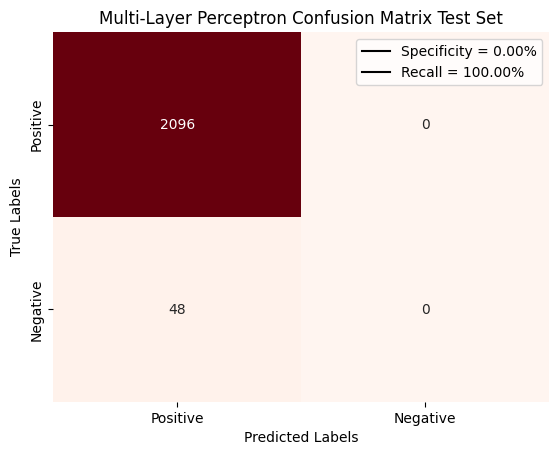

Accuracy = 0.978
F1-Score = 0.989
Recall Score = 1.000
Precision Score = 0.978
TP = 2096 FN = 0
FP = 48 TN = 0 

Prediction Success on Non-Healthy = 0.00%
Prediction Success on Healthy = 100.00% 



In [20]:
# creating an object of the experiment class
mlp_exp = Experiment(X_train_norm, y_train, MLPClassifier())

# training the data with the mlp model
results_df = mlp_exp.train_evaluate(X_test_norm, y_test, results_df,
                                   cmat_filename='mlp_cm_unbalanced',
                                   model_name='Multi-Layer Perceptron')


### showing and saving results

In [21]:
# showing the results
results_df

,Classifier Name,Set type,Number of training samples,Number of non-healthy companies in training sample,TP,TN,FP,FN,Precision,Recall,Specificity,F1-Score,Accuracy
0,Linear Discriminant Analysis,Train,8572,200,8281,14,186,91,0.978,0.989,0.070,0.984,0.968
1,Linear Discriminant Analysis,Test,8572,200,2080,2,46,16,0.978,0.992,0.042,0.985,0.971
2,Logistic Regression,Train,8572,200,8370,1,199,2,0.977,1.000,0.005,0.988,0.977
3,Logistic Regression,Test,8572,200,2096,0,48,0,0.978,1.000,0.000,0.989,0.978
4,Decision Tree,Train,8572,200,8372,200,0,0,1.000,1.000,1.000,1.000,1.000
5,Decision Tree,Test,8572,200,2059,7,41,37,0.980,0.982,0.146,0.981,0.964
6,K-Nearest Neighbors,Train,8572,200,8369,21,179,3,0.979,1.000,0.105,0.989,0.979
7,K-Nearest Neighbors,Test,8572,200,2094,1,47,2,0.978,0.999,0.021,0.988,0.977
8,Naive Bayes,Train,8572,200,7906,49,151,466,0.981,0.944,0.245,0.962,0.928
9,Naive Bayes,Test,8572,200,1992,8,40,104,0.980,0.950,0.167,0.965,0.933


In [22]:
# saving the results to an excel file
results_df.to_excel('result_files/excel_files/results_unbalanced_train.xlsx',
                    index=False)

## Data Analysis

### Class Balance

In [23]:
# creating a function that helps in class balance visualization
def balance_viz(X, y, set_type='', filename=''):

  # creating a figure that has two columns of plots in one line
  fig, ax = plt.subplots(1, 2, figsize = (16, 5))
  ax = ax.flatten()

  # creating a pie that displayes the target value percentages
  ax[0].pie(
      y.value_counts(),
      autopct = '%1.f%%',
      textprops = {'size' : 20, 'color' : 'white'}
  )

  # changing the name of the target for better visualization
  y = y.copy()
  y.name = ''

  # creating a countplot of the data
  sns.countplot(data=X, y=y, ax=ax[1])
  ax[1].yaxis.label.set_size(20)
  plt.yticks(fontsize = 12)
  ax[1].set_xlabel('Count', fontsize = 20)
  plt.xticks(fontsize = 12)

  fig.suptitle(f'Target in {set_type} Set', fontsize=25, fontweight='bold')
  plt.tight_layout()
  plt.savefig('result_files/balance/' + filename, bbox_inches='tight')

  plt.show()

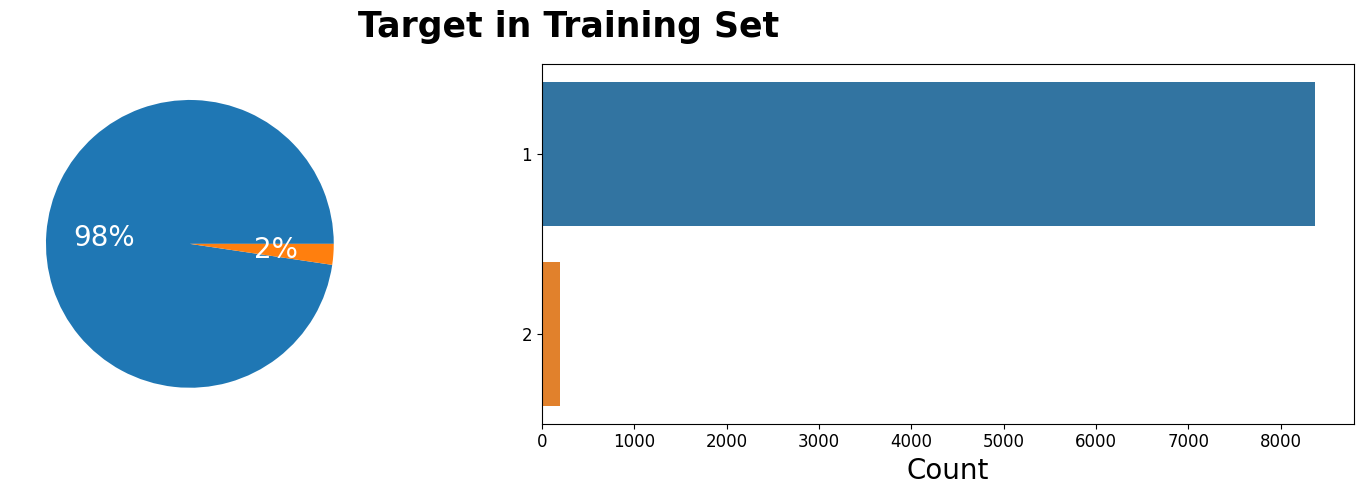

In [24]:
balance_viz(X_train_norm, y_train, 'Training', 'training_balance.png')

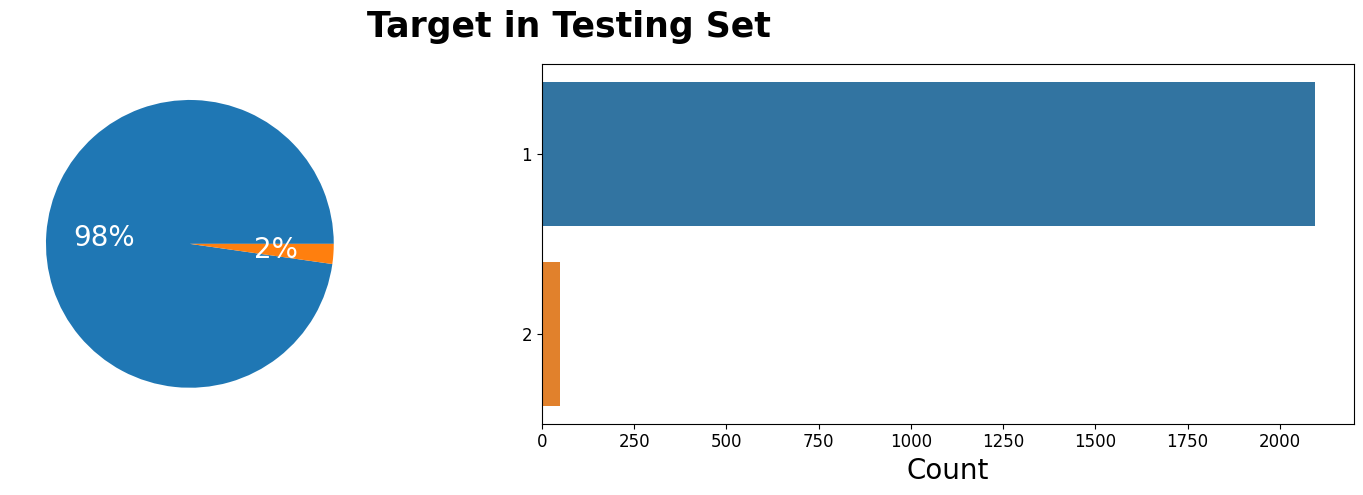

In [25]:
balance_viz(X_test_norm, y_test, 'Testing', 'testing_balance.png')

### Balancing the Data

In [26]:
# creating a function that balances the data
def balance(X_train, y_train, h_to_nh_ratio=3):

  # concatenating the data to remove healthy companies
  data = X_train.copy()
  data[y_train.name] = y_train.to_numpy()

  # getting the data of the non-healthy businesses
  data_nh = data[data.iloc[:, 11]==2]

  # getting the data of the healthy businesses
  data_h = data[data.iloc[:, 11]==1]

  # number of non healthy businesses
  number_of_nh = len(data_nh)

  # creating ratio 1 to 3 # this is random due to the fact that
  # the train_test_split was done first and shuffled the dataset.
  number_of_h = h_to_nh_ratio * number_of_nh
  new_data_h = data_h.iloc[0:number_of_h, :]

  # concatenating the two datasets and shuffling them
  balanced_train_data = pd.concat([new_data_h, data_nh], axis=0)\
                  .sample(frac=1, random_state=42)

  # splitting the dataset again to X and y
  X_train_bal = balanced_train_data.iloc[:, 0:11]
  y_train_bal = balanced_train_data.iloc[:, 11]

  return X_train_bal, y_train_bal

# balancing the data with ratio 1h to 3nh
X_train_bal, y_train_bal = balance(X_train_norm, y_train, h_to_nh_ratio=3)

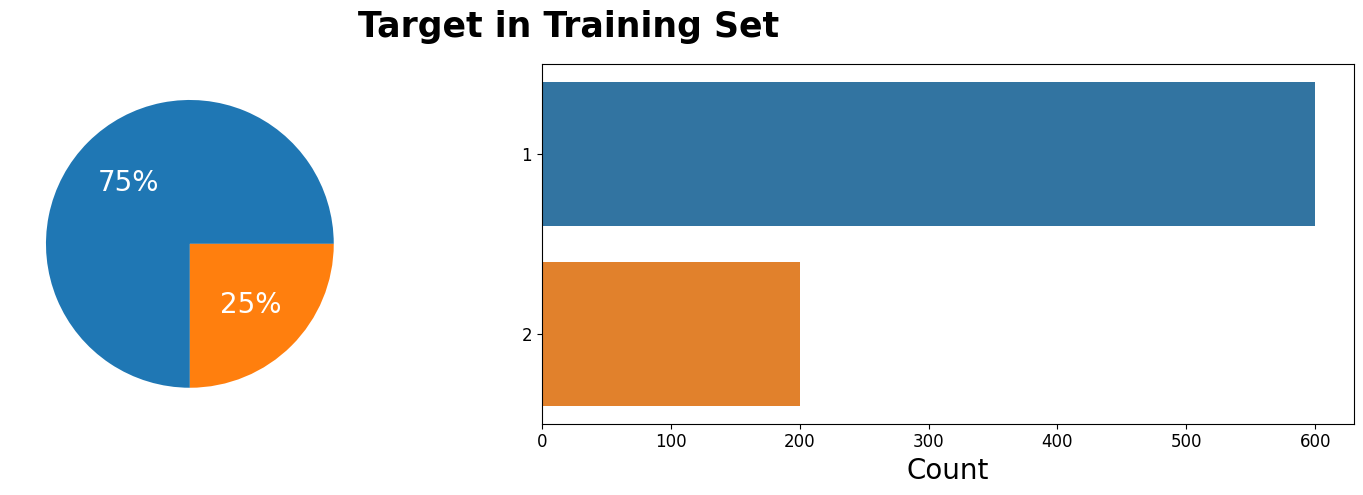

In [27]:
balance_viz(X_train_bal, y_train_bal, 'Training', '3_1balance.png')

### Also Balancing the training data with a 1 to 1 ratio for further experimentation

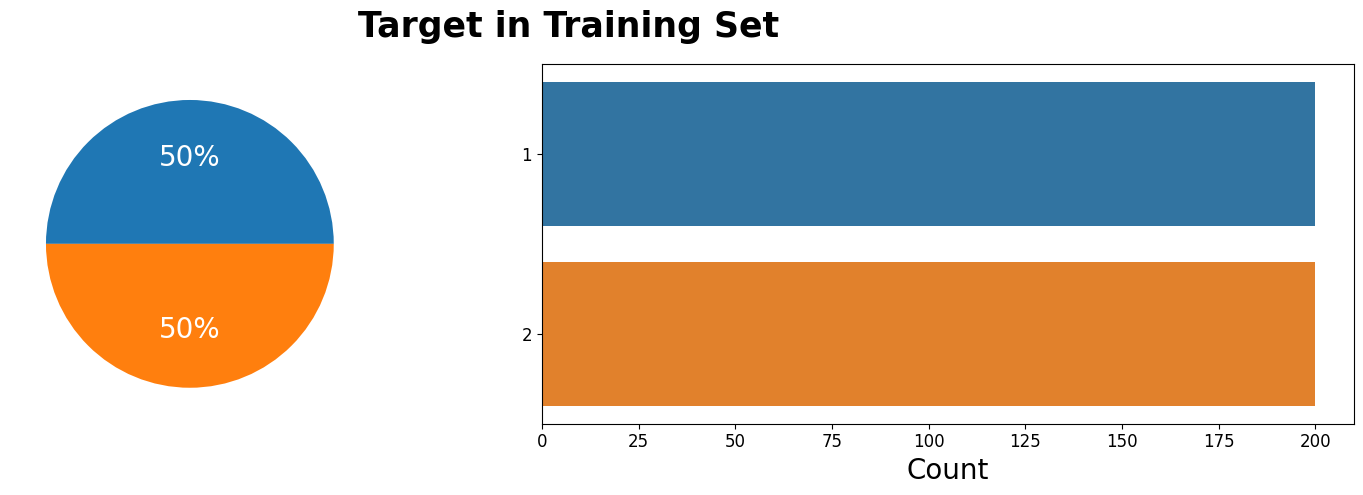

In [28]:
# balancing the data with ratio 1h to 1nh
X_train_bal_1, y_train_bal_1 = balance(X_train_norm, y_train, h_to_nh_ratio=1)
balance_viz(X_train_bal_1, y_train_bal_1, 'Training', '1_1balance.png')

## Training Models on Data with a 3 healthy - 1 non-healthy ratio in the training data

### Emptying the results dataframe

In [29]:

# creating the columns
columns = ['Classifier Name', 'Set type', 'Number of training samples',
           'Number of non-healthy companies in training sample',
           'TP', 'TN', 'FP', 'FN', 'Precision', 'Recall', 'Specificity',
           'F1-Score', 'Accuracy',]

# creating the dataframe with the columns
results_df = pd.DataFrame(columns=columns)

### Linear Discriminant Analysis

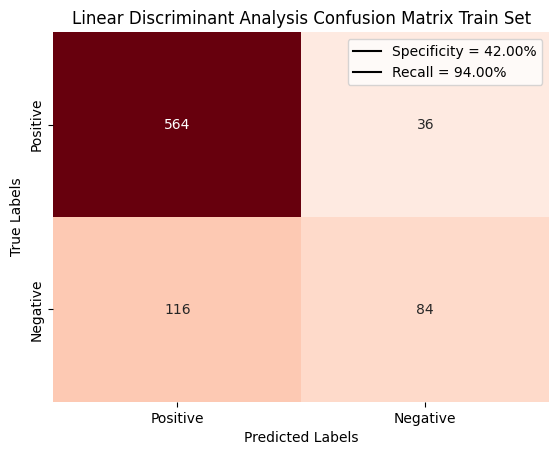

Accuracy = 0.810
F1-Score = 0.881
Recall Score = 0.940
Precision Score = 0.829
TP = 564 FN = 36
FP = 116 TN = 84 

Prediction Success on Non-Healthy = 42.00%
Prediction Success on Healthy = 94.00% 



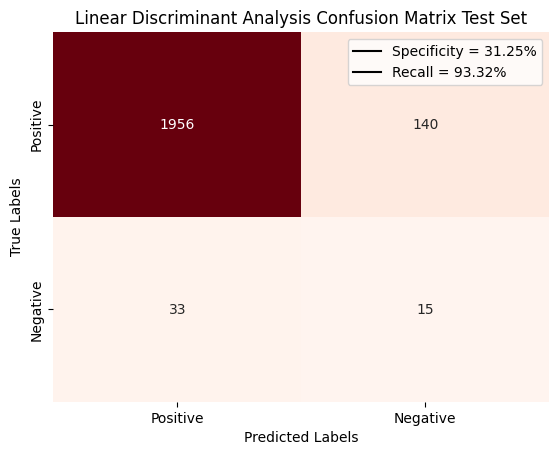

Accuracy = 0.919
F1-Score = 0.958
Recall Score = 0.933
Precision Score = 0.983
TP = 1956 FN = 140
FP = 33 TN = 15 

Prediction Success on Non-Healthy = 31.25%
Prediction Success on Healthy = 93.32% 



In [30]:
# creating an object of the experiment class
lda_exp = Experiment(X_train_bal, y_train_bal, LinearDiscriminantAnalysis())

# training the data with the lda model
results_df = lda_exp.train_evaluate(X_test_norm, y_test, results_df,
                                   cmat_filename='lda_cm3_1',
                                   model_name='Linear Discriminant Analysis')

### Logistic Regression

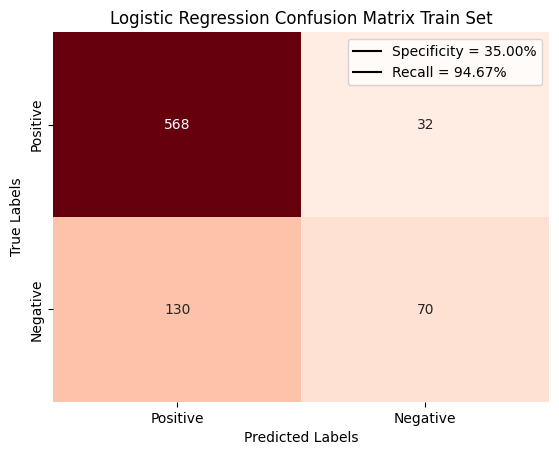

Accuracy = 0.797
F1-Score = 0.875
Recall Score = 0.947
Precision Score = 0.814
TP = 568 FN = 32
FP = 130 TN = 70 

Prediction Success on Non-Healthy = 35.00%
Prediction Success on Healthy = 94.67% 



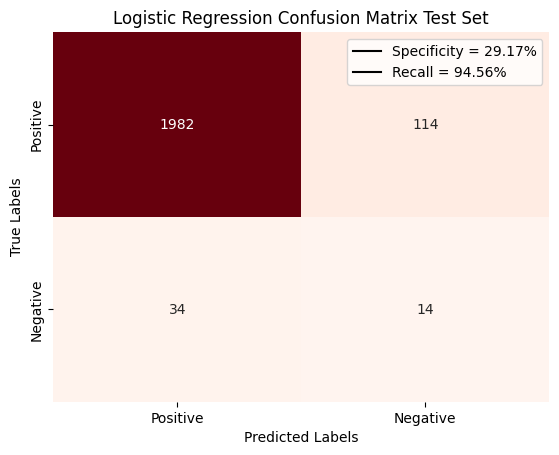

Accuracy = 0.931
F1-Score = 0.964
Recall Score = 0.946
Precision Score = 0.983
TP = 1982 FN = 114
FP = 34 TN = 14 

Prediction Success on Non-Healthy = 29.17%
Prediction Success on Healthy = 94.56% 



In [31]:
# creating an object of the experiment class
lr_exp = Experiment(X_train_bal, y_train_bal, LogisticRegression())

# training the data with the logistic regression model
results_df = lr_exp.train_evaluate(X_test_norm, y_test, results_df,
                                   cmat_filename='lr_cm3_1',
                                   model_name='Logistic Regression')


### Decision Tree

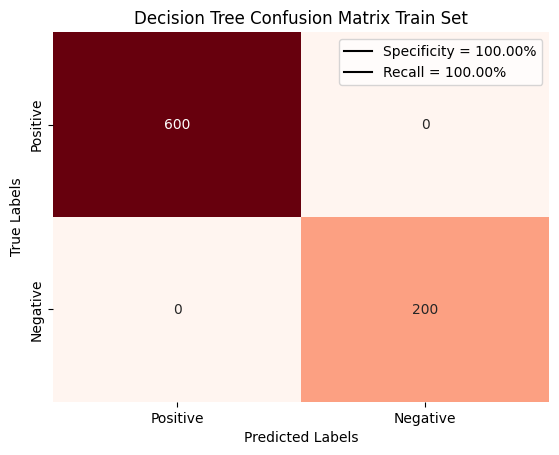

Accuracy = 1.000
F1-Score = 1.000
Recall Score = 1.000
Precision Score = 1.000
TP = 600 FN = 0
FP = 0 TN = 200 

Prediction Success on Non-Healthy = 100.00%
Prediction Success on Healthy = 100.00% 



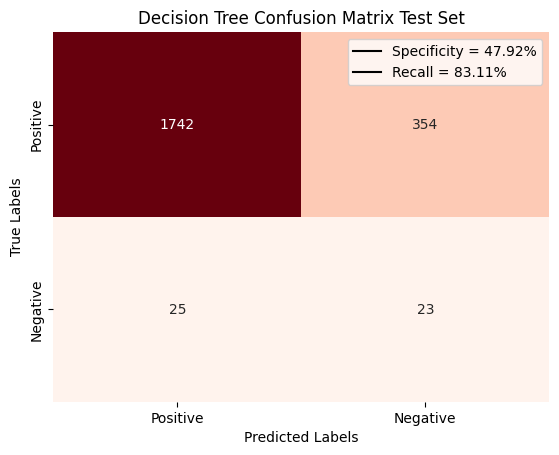

Accuracy = 0.823
F1-Score = 0.902
Recall Score = 0.831
Precision Score = 0.986
TP = 1742 FN = 354
FP = 25 TN = 23 

Prediction Success on Non-Healthy = 47.92%
Prediction Success on Healthy = 83.11% 



In [32]:
# creating an object of the experiment class
dt_exp = Experiment(X_train_bal, y_train_bal, DecisionTreeClassifier())

# training the data with the decision tree model
results_df = dt_exp.train_evaluate(X_test_norm, y_test, results_df,
                                   cmat_filename='dt_cm3_1',
                                   model_name='Decision Tree')


### KNN

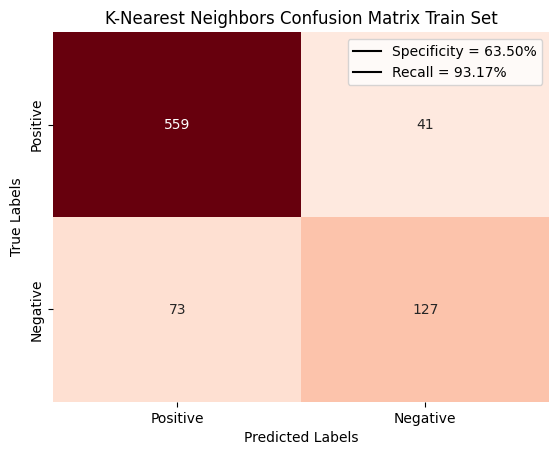

Accuracy = 0.858
F1-Score = 0.907
Recall Score = 0.932
Precision Score = 0.884
TP = 559 FN = 41
FP = 73 TN = 127 

Prediction Success on Non-Healthy = 63.50%
Prediction Success on Healthy = 93.17% 



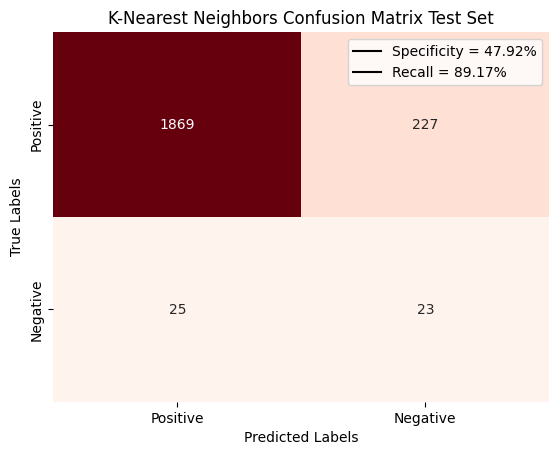

Accuracy = 0.882
F1-Score = 0.937
Recall Score = 0.892
Precision Score = 0.987
TP = 1869 FN = 227
FP = 25 TN = 23 

Prediction Success on Non-Healthy = 47.92%
Prediction Success on Healthy = 89.17% 



In [33]:
# creating an object of the experiment class
knn_exp = Experiment(X_train_bal, y_train_bal, KNeighborsClassifier())

# training the data with the  KNN model
results_df = knn_exp.train_evaluate(X_test_norm, y_test, results_df,
                                    cmat_filename='knn_cm3_1',
                                    model_name='K-Nearest Neighbors')


### Naive Bayes

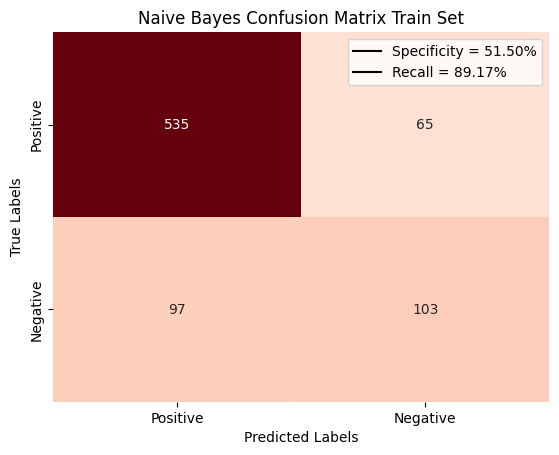

Accuracy = 0.797
F1-Score = 0.869
Recall Score = 0.892
Precision Score = 0.847
TP = 535 FN = 65
FP = 97 TN = 103 

Prediction Success on Non-Healthy = 51.50%
Prediction Success on Healthy = 89.17% 



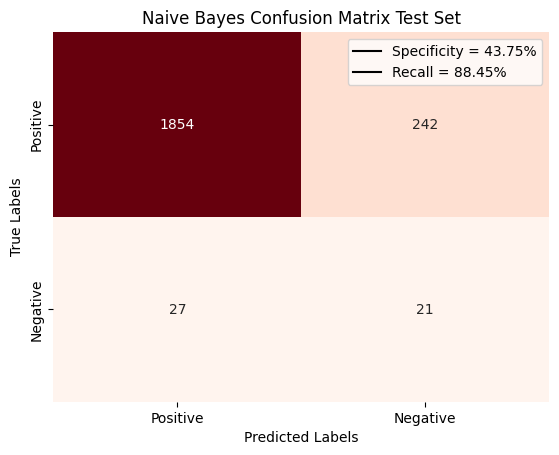

Accuracy = 0.875
F1-Score = 0.932
Recall Score = 0.885
Precision Score = 0.986
TP = 1854 FN = 242
FP = 27 TN = 21 

Prediction Success on Non-Healthy = 43.75%
Prediction Success on Healthy = 88.45% 



In [34]:
# creating an object of the experiment class
nb_exp = Experiment(X_train_bal, y_train_bal, GaussianNB())

# training the data with the naive bayes model
results_df = nb_exp.train_evaluate(X_test_norm, y_test, results_df,
                                   cmat_filename='nb_cm3_1',
                                   model_name='Naive Bayes')


### SVM

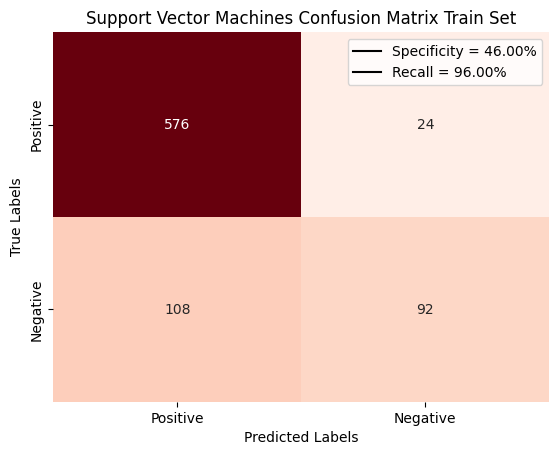

Accuracy = 0.835
F1-Score = 0.897
Recall Score = 0.960
Precision Score = 0.842
TP = 576 FN = 24
FP = 108 TN = 92 

Prediction Success on Non-Healthy = 46.00%
Prediction Success on Healthy = 96.00% 



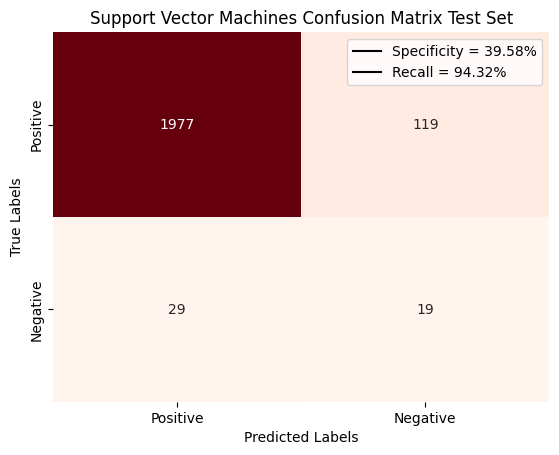

Accuracy = 0.931
F1-Score = 0.964
Recall Score = 0.943
Precision Score = 0.986
TP = 1977 FN = 119
FP = 29 TN = 19 

Prediction Success on Non-Healthy = 39.58%
Prediction Success on Healthy = 94.32% 



In [35]:
# creating an object of the experiment class
svm_exp = Experiment(X_train_bal, y_train_bal, SVC())

# training the data with the svm model
results_df = svm_exp.train_evaluate(X_test_norm, y_test, results_df,
                                   cmat_filename='svm_cm3_1',
                                   model_name='Support Vector Machines')


### MLP

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


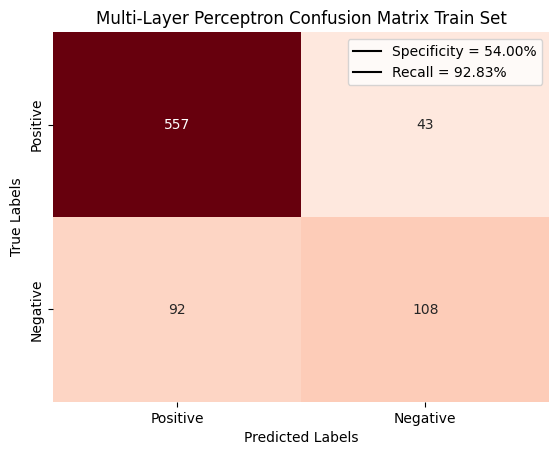

Accuracy = 0.831
F1-Score = 0.892
Recall Score = 0.928
Precision Score = 0.858
TP = 557 FN = 43
FP = 92 TN = 108 

Prediction Success on Non-Healthy = 54.00%
Prediction Success on Healthy = 92.83% 



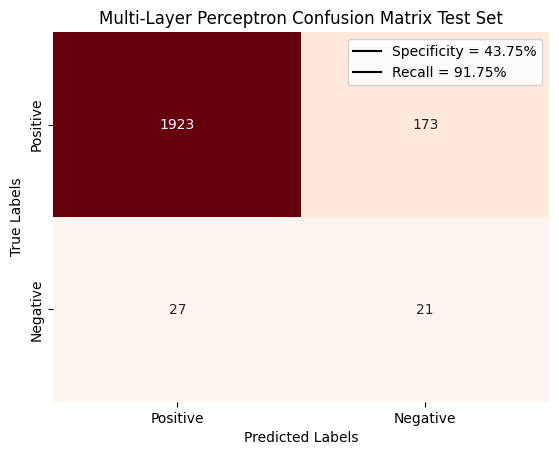

Accuracy = 0.907
F1-Score = 0.951
Recall Score = 0.917
Precision Score = 0.986
TP = 1923 FN = 173
FP = 27 TN = 21 

Prediction Success on Non-Healthy = 43.75%
Prediction Success on Healthy = 91.75% 



In [36]:
# creating an object of the experiment class
mlp_exp = Experiment(X_train_bal, y_train_bal, MLPClassifier())

# training the data with the mlp model
results_df = mlp_exp.train_evaluate(X_test_norm, y_test, results_df,
                                   cmat_filename='mlp_cm3_1',
                                   model_name='Multi-Layer Perceptron')


### Showing and saving results

In [37]:
# showing the results
results_df

,Classifier Name,Set type,Number of training samples,Number of non-healthy companies in training sample,TP,TN,FP,FN,Precision,Recall,Specificity,F1-Score,Accuracy
0,Linear Discriminant Analysis,Train,800,200,564,84,116,36,0.829,0.940,0.420,0.881,0.810
1,Linear Discriminant Analysis,Test,800,200,1956,15,33,140,0.983,0.933,0.312,0.958,0.919
2,Logistic Regression,Train,800,200,568,70,130,32,0.814,0.947,0.350,0.875,0.798
3,Logistic Regression,Test,800,200,1982,14,34,114,0.983,0.946,0.292,0.964,0.931
4,Decision Tree,Train,800,200,600,200,0,0,1.000,1.000,1.000,1.000,1.000
5,Decision Tree,Test,800,200,1742,23,25,354,0.986,0.831,0.479,0.902,0.823
6,K-Nearest Neighbors,Train,800,200,559,127,73,41,0.884,0.932,0.635,0.907,0.858
7,K-Nearest Neighbors,Test,800,200,1869,23,25,227,0.987,0.892,0.479,0.937,0.882
8,Naive Bayes,Train,800,200,535,103,97,65,0.847,0.892,0.515,0.869,0.798
9,Naive Bayes,Test,800,200,1854,21,27,242,0.986,0.885,0.438,0.932,0.875


In [38]:
# saving the results to an excel file
results_df.to_excel('result_files/excel_files/results_3to1_train.xlsx',
                    index=False)

## Training Models on Data with a 1 healthy - 1 non-healthy ratio in the training data

### Emptying the results dataframe

In [39]:

# creating the columns
columns = ['Classifier Name', 'Set type', 'Number of training samples',
           'Number of non-healthy companies in training sample',
           'TP', 'TN', 'FP', 'FN', 'Precision', 'Recall', 'Specificity',
           'F1-Score', 'Accuracy',]

# creating the dataframe with the columns
results_df = pd.DataFrame(columns=columns)

### Linear Discriminant Analysis

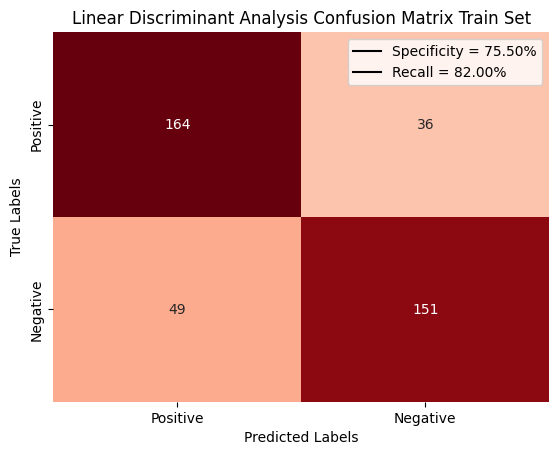

Accuracy = 0.787
F1-Score = 0.794
Recall Score = 0.820
Precision Score = 0.770
TP = 164 FN = 36
FP = 49 TN = 151 

Prediction Success on Non-Healthy = 75.50%
Prediction Success on Healthy = 82.00% 



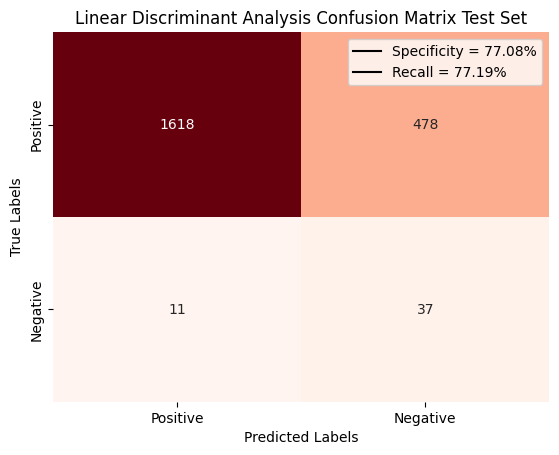

Accuracy = 0.772
F1-Score = 0.869
Recall Score = 0.772
Precision Score = 0.993
TP = 1618 FN = 478
FP = 11 TN = 37 

Prediction Success on Non-Healthy = 77.08%
Prediction Success on Healthy = 77.19% 



In [40]:
# creating an object of the experiment class
lda_exp = Experiment(X_train_bal_1, y_train_bal_1, LinearDiscriminantAnalysis())

# training the data with the logistic regression model
results_df = lda_exp.train_evaluate(X_test_norm, y_test, results_df,
                                   cmat_filename='lda_cm1_1',
                                   model_name='Linear Discriminant Analysis')

### Logistic Regression

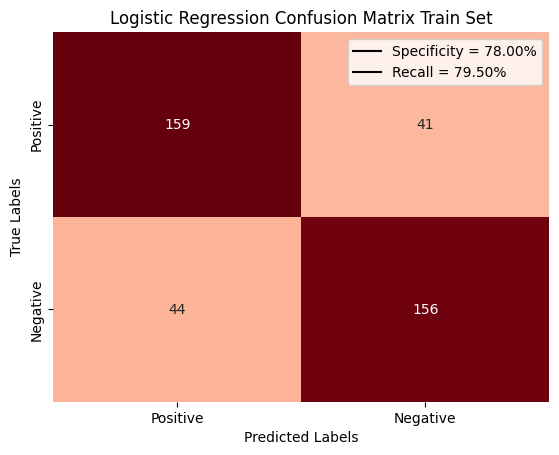

Accuracy = 0.787
F1-Score = 0.789
Recall Score = 0.795
Precision Score = 0.783
TP = 159 FN = 41
FP = 44 TN = 156 

Prediction Success on Non-Healthy = 78.00%
Prediction Success on Healthy = 79.50% 



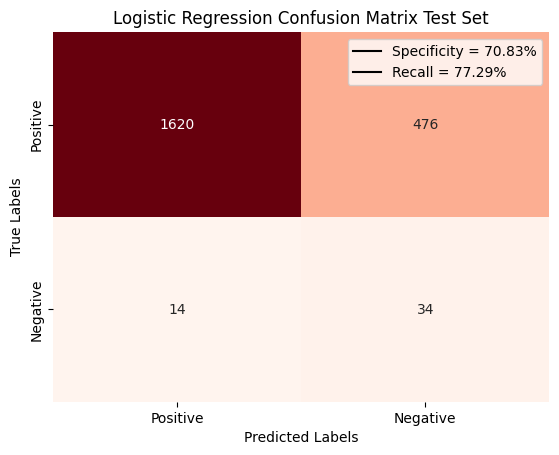

Accuracy = 0.771
F1-Score = 0.869
Recall Score = 0.773
Precision Score = 0.991
TP = 1620 FN = 476
FP = 14 TN = 34 

Prediction Success on Non-Healthy = 70.83%
Prediction Success on Healthy = 77.29% 



In [41]:
# creating an object of the experiment class
lr_exp = Experiment(X_train_bal_1, y_train_bal_1, LogisticRegression())

# training the data with the logistic regression model
results_df = lr_exp.train_evaluate(X_test_norm, y_test, results_df,
                                   cmat_filename='lr_cm1_1',
                                   model_name='Logistic Regression')


### Decision Tree

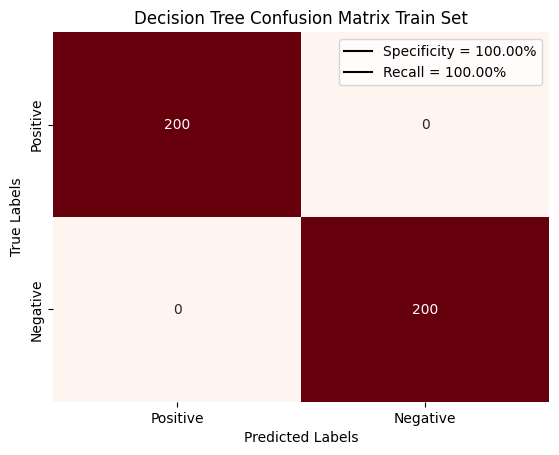

Accuracy = 1.000
F1-Score = 1.000
Recall Score = 1.000
Precision Score = 1.000
TP = 200 FN = 0
FP = 0 TN = 200 

Prediction Success on Non-Healthy = 100.00%
Prediction Success on Healthy = 100.00% 



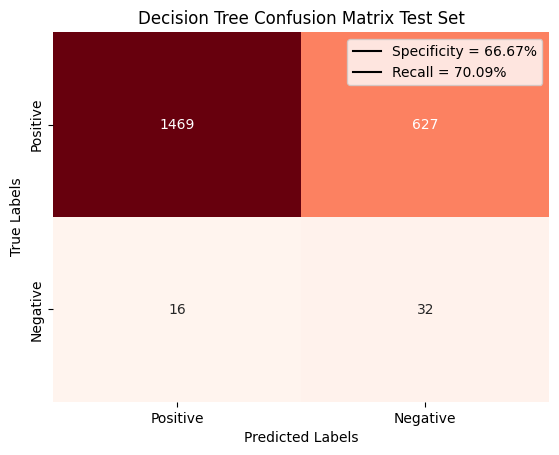

Accuracy = 0.700
F1-Score = 0.820
Recall Score = 0.701
Precision Score = 0.989
TP = 1469 FN = 627
FP = 16 TN = 32 

Prediction Success on Non-Healthy = 66.67%
Prediction Success on Healthy = 70.09% 



In [42]:
# creating an object of the experiment class
dt_exp = Experiment(X_train_bal_1, y_train_bal_1, DecisionTreeClassifier())

# training the data with the decision tree model
results_df = dt_exp.train_evaluate(X_test_norm, y_test, results_df,
                                   cmat_filename='dt_cm1_1',
                                   model_name='Decision Tree')


### KNN

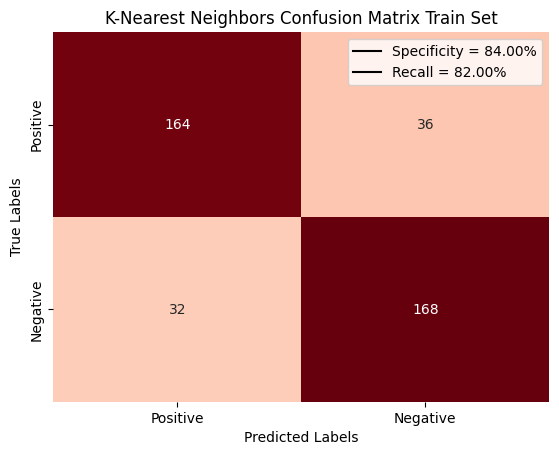

Accuracy = 0.830
F1-Score = 0.828
Recall Score = 0.820
Precision Score = 0.837
TP = 164 FN = 36
FP = 32 TN = 168 

Prediction Success on Non-Healthy = 84.00%
Prediction Success on Healthy = 82.00% 



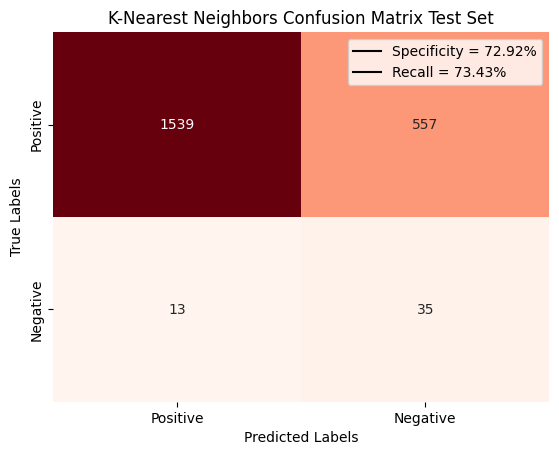

Accuracy = 0.734
F1-Score = 0.844
Recall Score = 0.734
Precision Score = 0.992
TP = 1539 FN = 557
FP = 13 TN = 35 

Prediction Success on Non-Healthy = 72.92%
Prediction Success on Healthy = 73.43% 



In [43]:
# creating an object of the experiment class
knn_exp = Experiment(X_train_bal_1, y_train_bal_1, KNeighborsClassifier())

# training the data with the  KNN model
results_df = knn_exp.train_evaluate(X_test_norm, y_test, results_df,
                                    cmat_filename='knn_cm1_1',
                                    model_name='K-Nearest Neighbors')


### Naive Bayes

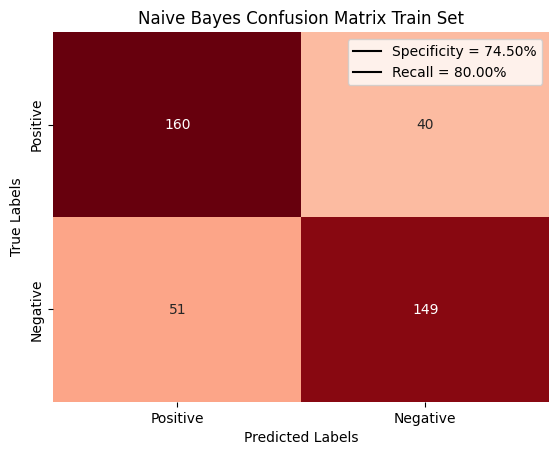

Accuracy = 0.772
F1-Score = 0.779
Recall Score = 0.800
Precision Score = 0.758
TP = 160 FN = 40
FP = 51 TN = 149 

Prediction Success on Non-Healthy = 74.50%
Prediction Success on Healthy = 80.00% 



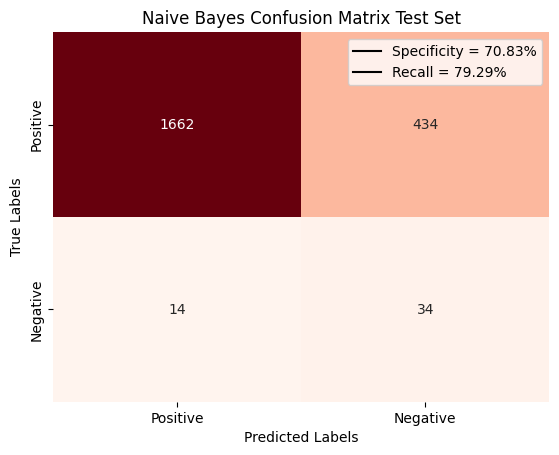

Accuracy = 0.791
F1-Score = 0.881
Recall Score = 0.793
Precision Score = 0.992
TP = 1662 FN = 434
FP = 14 TN = 34 

Prediction Success on Non-Healthy = 70.83%
Prediction Success on Healthy = 79.29% 



In [44]:
# creating an object of the experiment class
nb_exp = Experiment(X_train_bal_1, y_train_bal_1, GaussianNB())

# training the data with the logistic regression model
results_df = nb_exp.train_evaluate(X_test_norm, y_test, results_df,
                                   cmat_filename='nb_cm1_1',
                                   model_name='Naive Bayes')


### SVM

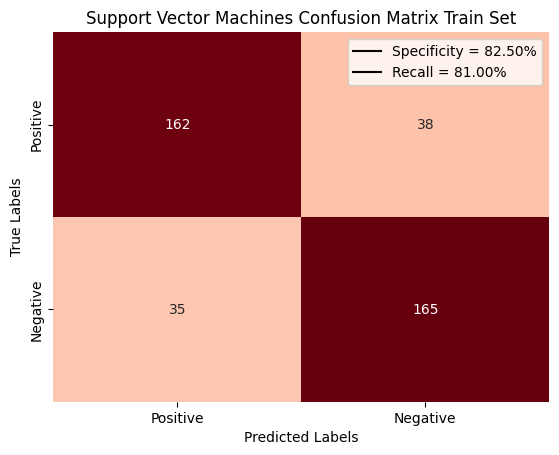

Accuracy = 0.818
F1-Score = 0.816
Recall Score = 0.810
Precision Score = 0.822
TP = 162 FN = 38
FP = 35 TN = 165 

Prediction Success on Non-Healthy = 82.50%
Prediction Success on Healthy = 81.00% 



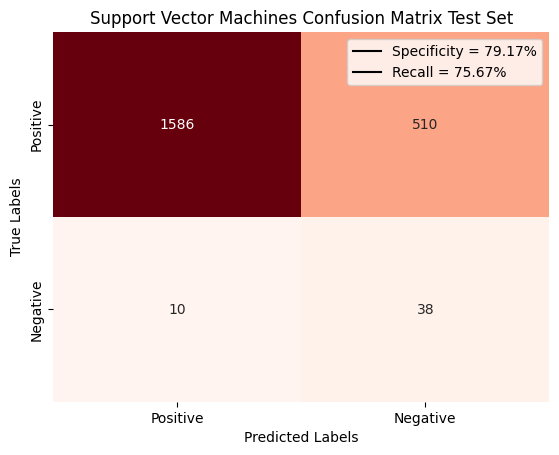

Accuracy = 0.757
F1-Score = 0.859
Recall Score = 0.757
Precision Score = 0.994
TP = 1586 FN = 510
FP = 10 TN = 38 

Prediction Success on Non-Healthy = 79.17%
Prediction Success on Healthy = 75.67% 



In [45]:
# creating an object of the experiment class
svm_exp = Experiment(X_train_bal_1, y_train_bal_1, SVC())

# training the data with the logistic regression model
results_df = svm_exp.train_evaluate(X_test_norm, y_test, results_df,
                                   cmat_filename='svm_cm1_1',
                                   model_name='Support Vector Machines')


### MLP

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


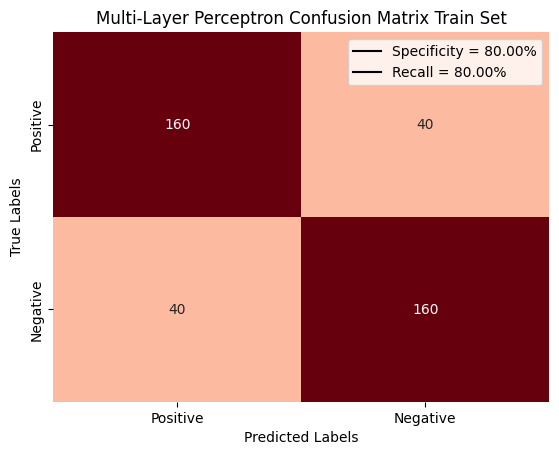

Accuracy = 0.800
F1-Score = 0.800
Recall Score = 0.800
Precision Score = 0.800
TP = 160 FN = 40
FP = 40 TN = 160 

Prediction Success on Non-Healthy = 80.00%
Prediction Success on Healthy = 80.00% 



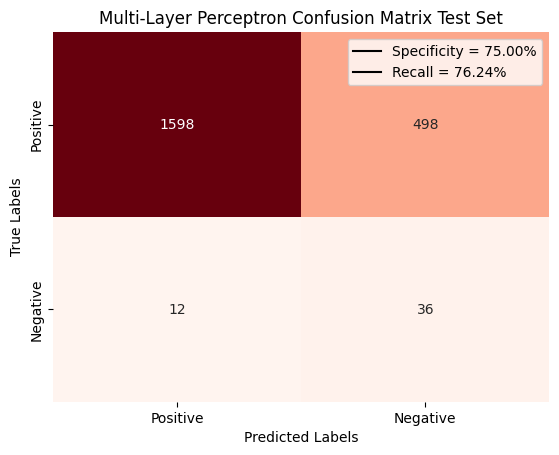

Accuracy = 0.762
F1-Score = 0.862
Recall Score = 0.762
Precision Score = 0.993
TP = 1598 FN = 498
FP = 12 TN = 36 

Prediction Success on Non-Healthy = 75.00%
Prediction Success on Healthy = 76.24% 



In [46]:
# creating an object of the experiment class
mlp_exp = Experiment(X_train_bal_1, y_train_bal_1, MLPClassifier())

# training the data with the logistic regression model
results_df = mlp_exp.train_evaluate(X_test_norm, y_test, results_df,
                                   cmat_filename='mlp_cm1_1',
                                   model_name='Multi-Layer Perceptron')


### showing and saving results

In [47]:
# showing the results
results_df

,Classifier Name,Set type,Number of training samples,Number of non-healthy companies in training sample,TP,TN,FP,FN,Precision,Recall,Specificity,F1-Score,Accuracy
0,Linear Discriminant Analysis,Train,400,200,164,151,49,36,0.770,0.820,0.755,0.794,0.788
1,Linear Discriminant Analysis,Test,400,200,1618,37,11,478,0.993,0.772,0.771,0.869,0.772
2,Logistic Regression,Train,400,200,159,156,44,41,0.783,0.795,0.780,0.789,0.788
3,Logistic Regression,Test,400,200,1620,34,14,476,0.991,0.773,0.708,0.869,0.771
4,Decision Tree,Train,400,200,200,200,0,0,1.000,1.000,1.000,1.000,1.000
5,Decision Tree,Test,400,200,1469,32,16,627,0.989,0.701,0.667,0.820,0.700
6,K-Nearest Neighbors,Train,400,200,164,168,32,36,0.837,0.820,0.840,0.828,0.830
7,K-Nearest Neighbors,Test,400,200,1539,35,13,557,0.992,0.734,0.729,0.844,0.734
8,Naive Bayes,Train,400,200,160,149,51,40,0.758,0.800,0.745,0.779,0.772
9,Naive Bayes,Test,400,200,1662,34,14,434,0.992,0.793,0.708,0.881,0.791


In [48]:
# saving the results to an excel file
results_df.to_excel('result_files/excel_files/results_1to1_train.xlsx',
                    index=False)

## Downloading Result Files

In [50]:
!zip -r /content/file.zip /content/result_files


from google.colab import files
files.download("/content/file.zip")


updating: content/result_files/ (stored 0%)
updating: content/result_files/excel_files/ (stored 0%)
updating: content/result_files/excel_files/results_unbalanced_train.xlsx (deflated 9%)
updating: content/result_files/excel_files/results_1to1_train.xlsx (deflated 9%)
updating: content/result_files/excel_files/results_3to1_train.xlsx (deflated 9%)
updating: content/result_files/confusion_matrices/ (stored 0%)
updating: content/result_files/confusion_matrices/mlp_cm_unbalanced_train.png (deflated 12%)
updating: content/result_files/confusion_matrices/nb_cm_unbalanced_test.png (deflated 11%)
updating: content/result_files/confusion_matrices/svm_cm3_1_test.png (deflated 11%)
updating: content/result_files/confusion_matrices/lr_cm1_1_test.png (deflated 11%)
updating: content/result_files/confusion_matrices/nb_cm1_1_train.png (deflated 10%)
updating: content/result_files/confusion_matrices/nb_cm3_1_test.png (deflated 11%)
updating: content/result_files/confusion_matrices/knn_cm1_1_train.png 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>